In [3]:
import wfdb
import scipy.io
import os

In [38]:
path_to_data = 'H:\data\you-snooze-you-win-the-physionet-computing-in-cardiology-challenge-2018-1.0.0\\training\\tr03-0029'

item = 'tr03-0029'

combined = os.path.join(path_to_data, item)


In [49]:
"""
There are 4 files

tr03-0029.arousal
tr03-0029.hea
tr03-0029.mat
tr03-0029-arousal.mat
"""



# Arousal files (.mat)
matrix_thing = scipy.io.loadmat(combined + ".mat")


# matrix_thing_arousals = scipy.io.loadmat(combined + "-arousal")


# Signal (.mat) and header (.hea) files
record = wfdb.rdrecord(combined)

# Arousal annotation files (.arousal)
annotation = wfdb.rdann(combined, 'arousal')

In [50]:
print(matrix_thing.keys())

print(matrix_thing['val'].shape)

dict_keys(['val'])
(13, 4770000)


In [14]:
print(annotation.__dict__.keys())

print(record.__dict__.keys())

dict_keys(['val'])
dict_keys(['record_name', 'extension', 'sample', 'symbol', 'subtype', 'chan', 'num', 'aux_note', 'fs', 'label_store', 'description', 'custom_labels', 'contained_labels', 'ann_len'])
dict_keys(['record_name', 'n_sig', 'fs', 'counter_freq', 'base_counter', 'sig_len', 'base_time', 'base_date', 'comments', 'sig_name', 'p_signal', 'd_signal', 'e_p_signal', 'e_d_signal', 'file_name', 'fmt', 'samps_per_frame', 'skew', 'byte_offset', 'adc_gain', 'baseline', 'units', 'adc_res', 'adc_zero', 'init_value', 'checksum', 'block_size'])


In [64]:
print(annotation.__dict__)
print("\n", "-"*80, "\n")
print(record.__dict__)

{'record_name': 'tr03-0029', 'extension': 'arousal', 'sample': array([ 108000,  234000,  240000,  245674,  246000,  249974,  251920,
        252000,  254580,  269442,  270000,  273802,  276422,  279162,
        283670,  286590,  291948,  294568,  300250,  302950,  305956,
        309435,  311466,  313226,  316780,  320500,  326136,  330000,
        330536,  334046,  338166,  347344,  348000,  349604,  354188,
        356448,  359002,  361542,  366802,  370062,  375740,  377940,
        378900,  381440,  384630,  387790,  391830,  394330,  395210,
        398489,  399666,  402046,  409194,  412134,  415120,  417480,
        420000,  420434,  425034,  428932,  432432,  436132,  439611,
        444606,  447646,  451658,  455258,  456850,  460270,  462116,
        465076,  468000,  469610,  472410,  474000,  476394,  479794,
        482124,  485744,  487806,  490826,  494368,  497828,  501422,
        504000,  506502,  510000,  514254,  517574,  522000,  525606,
        528106,  531286,  5

In [68]:
print(annotation.sample.shape, len(annotation.symbol))

print(len(annotation.aux_note))

print("\n", "-"*80, "\n")

print(record.p_signal.shape)

print(record.sig_name)


"""
O.K. so from what I understand. Sample gives you the time-indices for the events (or change in events). 
The first event, 'waking' is from 0:108000 for example. 

subtype are integers for event types? but there are 23? They seeeem to correspond to the  aux note.

chan is ?? but there are 2 channels, probably the first 2, see below on figure. Maybe where the annotators 
found the event? hmm or where it's most visible? First 2 EEG are 'F3-M2' and 'F4-M1'

aux_note tells me what the event is, but the way it's written is difficult for me to extract...
what does '(resp_hypopnea', 'N1', 'resp_hypopnea)' mean? The start and end of a resp_hypopnea event?


"""

(496,) 496
496

 -------------------------------------------------------------------------------- 

(4770000, 13)
['F3-M2', 'F4-M1', 'C3-M2', 'C4-M1', 'O1-M2', 'O2-M1', 'E1-M2', 'Chin1-Chin2', 'ABD', 'CHEST', 'AIRFLOW', 'SaO2', 'ECG']


In [74]:
import collections

cnt = collections.Counter()

for thing in annotation.aux_note:
    cnt[thing] += 1

print(cnt)

Counter({'(resp_hypopnea': 85, 'resp_hypopnea)': 85, '(resp_obstructiveapnea': 61, 'resp_obstructiveapnea)': 61, '(arousal_rera': 44, 'arousal_rera)': 44, 'N1': 41, 'W': 32, 'N2': 24, '(resp_centralapnea': 7, 'resp_centralapnea)': 7, 'N3': 4, 'R': 1})


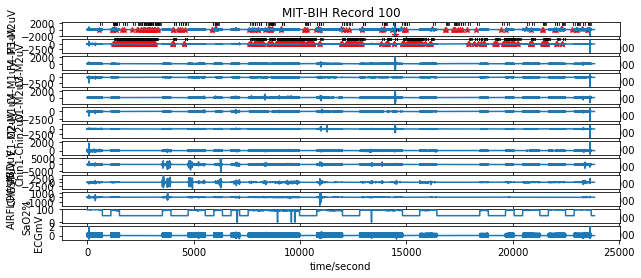

In [17]:
# plotting the record object with annotation

wfdb.plot_wfdb(record=record, annotation=annotation, plot_sym=True,
                   time_units='seconds', title='MIT-BIH Record 100',
                   figsize=(10,4))